In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [18]:
dataset = pd.read_csv('job_skills.csv')

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
Company                     1250 non-null object
Title                       1250 non-null object
Category                    1250 non-null object
Location                    1250 non-null object
Responsibilities            1235 non-null object
Minimum Qualifications      1236 non-null object
Preferred Qualifications    1236 non-null object
dtypes: object(7)
memory usage: 34.2+ KB


In [20]:
dataset.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [23]:
# Paises de preferencia de trabalho do Google
job_skills = pd.DataFrame()
job_skills['Country_Location'] = dataset['Location'].str.split(',').str[-1]
country_value_counts = job_skills.Country_Location.value_counts()
country_value_counts = country_value_counts[country_value_counts > 10]

df_popular_country = pd.Series.to_frame(country_value_counts).reset_index()
df_popular_country.columns=['Country_Location', 'Preference']
df_popular_country.head()

,Country_Location,Preference
0,United States,638
1,Ireland,87
2,United Kingdom,62
3,Germany,54
4,Singapore,41


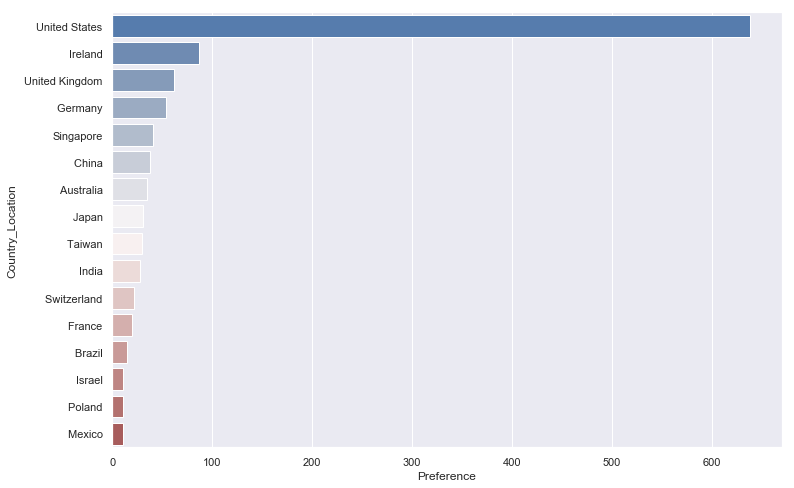

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Preference', y='Country_Location' , data=df_popular_country, palette="vlag",)

In [43]:
# Cidades mais populares
job_skills = pd.DataFrame()
job_skills['City_Location'] = dataset['Location'].str.split(',').str[0]
city_value_counts = job_skills.City_Location.value_counts()
city_value_counts = city_value_counts[city_value_counts > 10]

df_popular_city = pd.Series.to_frame(city_value_counts).reset_index()
df_popular_city.columns = ['City', 'Preference']
df_popular_city.head()

,City,Preference
0,Mountain View,190
1,Sunnyvale,155
2,Dublin,87
3,New York,70
4,London,62


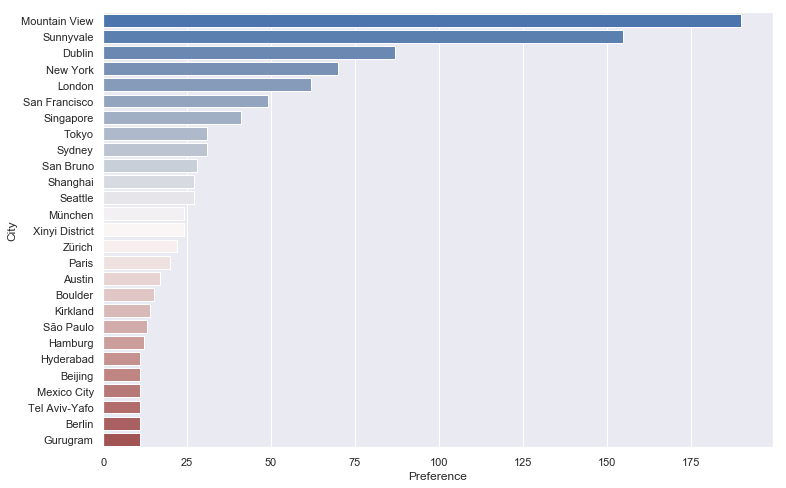

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Preference', y='City' , data=df_popular_city, palette="vlag",)

In [48]:
# Preferencia e linguagem de programação 
programing_language_list = ['go','r', 'sas', 'matlab','stata','python', 'java','net', 'c++','html','css', 'php', \
                            'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','mysql','mapreduce','hadoop','kotlin']
min_qualification = dataset['Minimum Qualifications'].tolist()
min_qualification_string = ''.join(map(str, min_qualification)).lower()

In [52]:
skillcount = dict((keys,0) for keys in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", min_qualifications_string):
    if w in skillcount:
        skillcount[w] += 1
print(skillcount)
#Converting dictionary to Dataframe in ascending
df_popular_programming_lang = pd.DataFrame.from_dict(skillcount, orient='index').sort_values(by=0,ascending=False).reset_index()
df_popular_programming_lang.columns=['Programming_Language', 'Popularity'] #Assigning column
# Capitalize each programming language first letter
df_popular_programming_lang['Programming_Language'] = df_popular_programming_lang.Programming_Language.str.capitalize()
#df_popular_programming_lang = df_popular_programming_lang[::-1] 
df_popular_programming_lang.head(10)

NameError: name 're' is not defined